In [1]:
import pandas as pd
import os
import nltk

In [2]:
df = pd.read_csv ("zdruzeni_podatki.csv")

In [3]:
#SPREMENI NaN V CLASS "BREZ"
df = df.fillna("Brez")
#VRŽI IZ DF VSE, KI IMAJO CLASS "BREZ"
df = df.loc[~df["class"].str.contains("Brez")]
df

,Unnamed: 0,class,content
0,0,Asistenca,"Obveščamo vas, da je od kreiranja primera CUDV..."
1,1,Asistenca,"Obveščamo vas, da je od kreiranja primera DAVI..."
2,2,Asistenca,vv\n\nOd: arc@assist-austria.com <arc@assist-a...
3,3,Asistenca,"Obveščamo vas, da je od kreiranja primera ALEŠ..."
4,4,Asistenca,"Obveščamo vas, da je od kreiranja primera SUMM..."
...,...,...,...
36124,36124,Življenje,"<html><head>_x000D_\n<meta http-equiv=""Content..."
36125,36125,Življenje,"<html><head>_x000D_\n<meta http-equiv=""Content..."
36126,36126,Življenje,Pozdravljeni\nProsim za podatek kdaj lahko dob...
36127,36127,Življenje,"Pozdravljeni,\n\ndo 31.12. mi je moj prejšnji ..."


In [4]:
df = df.drop(columns=["Unnamed: 0"])

In [5]:
df

,class,content
0,Asistenca,"Obveščamo vas, da je od kreiranja primera CUDV..."
1,Asistenca,"Obveščamo vas, da je od kreiranja primera DAVI..."
2,Asistenca,vv\n\nOd: arc@assist-austria.com <arc@assist-a...
3,Asistenca,"Obveščamo vas, da je od kreiranja primera ALEŠ..."
4,Asistenca,"Obveščamo vas, da je od kreiranja primera SUMM..."
...,...,...
36124,Življenje,"<html><head>_x000D_\n<meta http-equiv=""Content..."
36125,Življenje,"<html><head>_x000D_\n<meta http-equiv=""Content..."
36126,Življenje,Pozdravljeni\nProsim za podatek kdaj lahko dob...
36127,Življenje,"Pozdravljeni,\n\ndo 31.12. mi je moj prejšnji ..."


In [6]:
from nltk.tokenize.punkt import PunktSentenceTokenizer, PunktTrainer


In [7]:
from nltk.corpus import stopwords
print(stopwords.fileids())

['arabic', 'azerbaijani', 'bengali', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


In [8]:
#DETERMINE SLOVENE STOPWORDS

slo_stopwords = stopwords.words("slovene")

In [11]:
#REMOVE STOPWORDS FROM SLOVENE BASE

df['no_stopwords'] = df['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in (slo_stopwords)]))
print(df)

           class                                            content  \
0      Asistenca  Obveščamo vas, da je od kreiranja primera CUDV...   
1      Asistenca  Obveščamo vas, da je od kreiranja primera DAVI...   
2      Asistenca  vv\n\nOd: arc@assist-austria.com <arc@assist-a...   
3      Asistenca  Obveščamo vas, da je od kreiranja primera ALEŠ...   
4      Asistenca  Obveščamo vas, da je od kreiranja primera SUMM...   
...          ...                                                ...   
36124  Življenje  <html><head>_x000D_\n<meta http-equiv="Content...   
36125  Življenje  <html><head>_x000D_\n<meta http-equiv="Content...   
36126  Življenje  Pozdravljeni\nProsim za podatek kdaj lahko dob...   
36127  Življenje  Pozdravljeni,\n\ndo 31.12. mi je moj prejšnji ...   
36128  Življenje  Pozdravljeni.Zaradi izrednih razmer v trenutni...   

                                            no_stopwords  
0      Obveščamo vas, kreiranja primera CUDV ČRNA NA ...  
1      Obveščamo vas, kreiran

In [15]:
#LOWER-CASING NO_STOPWORDS COLUMN

df["no_stopwords"] = df["no_stopwords"].str.lower()

In [16]:
#STRIPPING NO_STOPWORD COLUMN

df["no_stopwords"] = df["no_stopwords"].apply(lambda x: x.strip())

In [17]:
import re

In [18]:
#REMOVING EMAIL ADRESSES FROM STRINGS USING REGEX

df['no_stopwords'] = df['no_stopwords'].apply(lambda x: re.sub('\S*@\S*\s?', '' , x))

In [19]:
import string

In [20]:
#REMOVING PUNCTUATION

df['no_stopwords'] = df['no_stopwords'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ' , x))

In [21]:
#REMOVING DIGITS FROM NO_STOPWORDS

df['no_digits'] = df['no_stopwords'].apply(lambda x: re.sub('[\d]', "" , x))

In [22]:
#REMOVING SINGLE CHARACTERS FROM NO_DIGITS

df['no_digits'] = df['no_digits'].apply(lambda x: re.sub(r"\b[a-zA-Z]\b", "" , x))

In [23]:
print(df.iloc[6100,3])

pozdravljeni prosim podaljšanje nadomestnega vozila slaa simona rebolj stranka vozila vrnila   lepimi pozdravi   img  img   aljoša končar  dipl ekonomist prodajni svetovalec                  www avto kavsek si    avto kavšek  stanislav kavšek    stantetova ulica   ivančna gorica       https   eur safelinks protection outlook com  url http   fwww avto kavsek si  data   cac cenitve triglav si cadeabbdea ceefdcbbfdee    cunknown ctwfpbgzsbdeyjwijoimcwljawmdailcjqijoivlumziilcjbtiiikhawwilcjxvcimn   sdata  fwilmellssuvzouyrfupzthtolkamxs bgnqpozk  reserved 


In [24]:
#REMOVING WORDS LONGER THAN 16 CHARACTERS FROM NO_DIGITS

df['no_digits'] = df['no_digits'].apply(lambda x: re.sub(r'\b\w{16,100}\b', "" , x))

In [25]:
print(df.iloc[6100,3])

pozdravljeni prosim podaljšanje nadomestnega vozila slaa simona rebolj stranka vozila vrnila   lepimi pozdravi   img  img   aljoša končar  dipl ekonomist prodajni svetovalec                  www avto kavsek si    avto kavšek  stanislav kavšek    stantetova ulica   ivančna gorica       https   eur safelinks protection outlook com  url http   fwww avto kavsek si  data   cac cenitve triglav si cadeabbdea ceefdcbbfdee    cunknown    sdata   bgnqpozk  reserved 


In [26]:
#TOKENIZING

#df['no_stopwords']=df['no_stopwords'].apply(str)
df['tokenized'] = df.apply(lambda row: 
                               nltk.word_tokenize(row['no_digits']), 
                               axis=1)

In [27]:
print(df.iloc[24000,1])

Pozdravljeni,

v petek sem plačal položnico za zavarovanje za avto, in ker sem ga imel shranjeno kot hitro plačilo, nisem opazil (šele po plačilu) da je pa TRR na novi položnici drugačen od tistega ki sem ga uporabljal do zdaj.

položnica je bila plačana na prejšnji trr račun in ne na novega - si56 040010048780804

potrdilo o plačilu je v priponki.

je problem, ker je bila položnica plačana na drug trr?

najlepša hvala

Lep pozdrav, Miha Fuks


In [28]:
print(df.iloc[24000,4])

['pozdravljeni', 'petek', 'plačal', 'položnico', 'zavarovanje', 'avto', 'imel', 'shranjeno', 'hitro', 'plačilo', 'opazil', 'šele', 'plačilu', 'trr', 'novi', 'položnici', 'uporabljal', 'zdaj', 'položnica', 'plačana', 'prejšnji', 'trr', 'račun', 'novega', 'si', 'potrdilo', 'plačilu', 'priponki', 'problem', 'položnica', 'plačana', 'trr', 'najlepša', 'hvala', 'lep', 'pozdrav', 'miha', 'fuks']


In [29]:
from nltk import FreqDist

In [30]:
df["counted"] = df["tokenized"].apply(FreqDist)

In [31]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
from sqlite3 import Error
from sklearn.ensemble import RandomForestClassifier
import sqlite3
import pickle



In [32]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline
from sklearn import preprocessing
from sklearn.dummy import DummyClassifier



In [33]:
#DETOKENIZACIJA

from nltk.tokenize.treebank import TreebankWordDetokenizer
df['detoken']=df['tokenized'].apply(lambda x: TreebankWordDetokenizer().detokenize(x))

In [34]:
print(df['class'].value_counts())

Premoženje                         15598
Asistenca brez primera             10435
Življenje                           2973
Drajv                               2926
drugo                               1944
Zdravje                              989
PDPZ                                 524
Odjava B2B                           331
Asistenca                            277
Marketinške akcije                    53
GDPR                                  43
Banke                                 17
CORIS                                 12
Zavarovanja - zunanji partnerji        5
Help desk - interna javnost            2
Name: class, dtype: int64


In [35]:
my_tags= ["Premoženje", "Asistenca brez primera", "Življenje", "Drajv", "drugo", 
          "Zdravje", "PDPZ", "Odjava B2B", "Asistenca", "Marketinške akcije", "GDPR", 
          "Banke", "CORIS", "Zavarovanja - zunanji partnerji", "Help desk - interna javnost"]

In [66]:
df_tok = df.drop(columns=["content", "no_stopwords","no_digits", "counted","detoken"])

In [37]:
df_tok.set_index('class').T.to_dict('list')

<ipython-input-37-fd78af303973>:1: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  df_tok.set_index('class').T.to_dict('list')


{'Asistenca': [['pozdravljeni',
   'prosim',
   'zadevo',
   'prilogi',
   'uredite',
   'vidna',
   'portalu',
   'lahko',
   'izdelamo',
   'račun',
   'hvala',
   'lep',
   'pozdrav',
   'sašo',
   'škrbec',
   'vodja',
   'poprodaje',
   'img',
   'logo',
   'renault',
   'avtohiša',
   'malgaj',
   'gabrsko',
   'trbovlje',
   'tel',
   'fax',
   'od',
   'zavarovalnica',
   'triglav',
   'poslano',
   'četrtek',
   'december',
   'za',
   'zadeva',
   'prod',
   'nalog',
   'za',
   'izvedbo',
   'asistenčne',
   'storitve',
   'nadomestno',
   'vozilo',
   'št',
   'slaa',
   'img',
   'zavarovalnica',
   'triglav',
   'prod',
   'nalog',
   'za',
   'izvedbo',
   'asistenčne',
   'storitve',
   'nadomestno',
   'vozilo',
   'št',
   'slaa',
   'spoštovani',
   'prilogi',
   'pošiljamo',
   'nalog',
   'izvedbo',
   'storitve',
   'nadomestno',
   'vozilo',
   'št',
   'slaa',
   'primeru',
   'sporočilo',
   'prejeli',
   'pomotoma',
   'prosimo',
   'obvestite',
   'naslov',
 

In [38]:
df_detok = df.drop(columns=["content", "no_stopwords","no_digits", "counted","tokenized"])

In [39]:
detok_dict = df_detok.groupby('class').apply(lambda dfg: dfg.drop('class', axis=1).to_dict(orient='list')).to_dict()

In [ ]:
from collections import *
asist_list_2 = (detok_dict["Asistenca"]['detoken'])

In [ ]:
asist_list_2

In [ ]:
asist_list_2 = " ".join(asist_list_2)

In [ ]:
asist_list_2

In [ ]:
asist_list = asist_list.split(" ")

In [ ]:
x = Counter(asist_list)

In [ ]:
urejeni_asist = x.most_common()

In [ ]:
urejeni_asist

In [ ]:
asist_list

In [ ]:
import matplotlib
%matplotlib inline
urejeni_asist.plot(20)

In [ ]:
from nltk.probability import FreqDist
fdist = FreqDist()
for word in asist_list:
    fdist[word]+=1
fdist

In [ ]:
fdist.plot(50)

In [ ]:
my_tags

In [ ]:
slovar_vseh_besed = defaultdict(li)
for tag in my_tags:
    asist_list_2 = (detok_dict[tag]['detoken'])

In [84]:
#FUNKCIJA PREJME SLOVAR, KJER SO KLJUČI RAZREDI, VREDNOSTI PA STRING VSEH BESED V TEM RAZREDU

def ocisti_slovar(vnos):
    
    
    from nltk.probability import FreqDist
    import matplotlib
    %matplotlib inline
    
    
    my_tags= ["Premoženje", "Asistenca brez primera", "Življenje", "Drajv", "drugo", 
          "Zdravje", "PDPZ", "Odjava B2B", "Asistenca", "Marketinške akcije", "GDPR", 
          "Banke", "CORIS", "Zavarovanja - zunanji partnerji",
              "Help desk - interna javnost"]
    
    for oznaka in my_tags:
        print(oznaka)
        seznam = (vnos[oznaka]['detoken'])
        besedilo = " ".join(seznam)
        besedilo = besedilo.split(" ")
        
        fdist = FreqDist()
        for beseda in besedilo:
            fdist[beseda]+=1
            
        plt.figure(figsize=(20, 8))   
        print(fdist.plot(35))

Premoženje


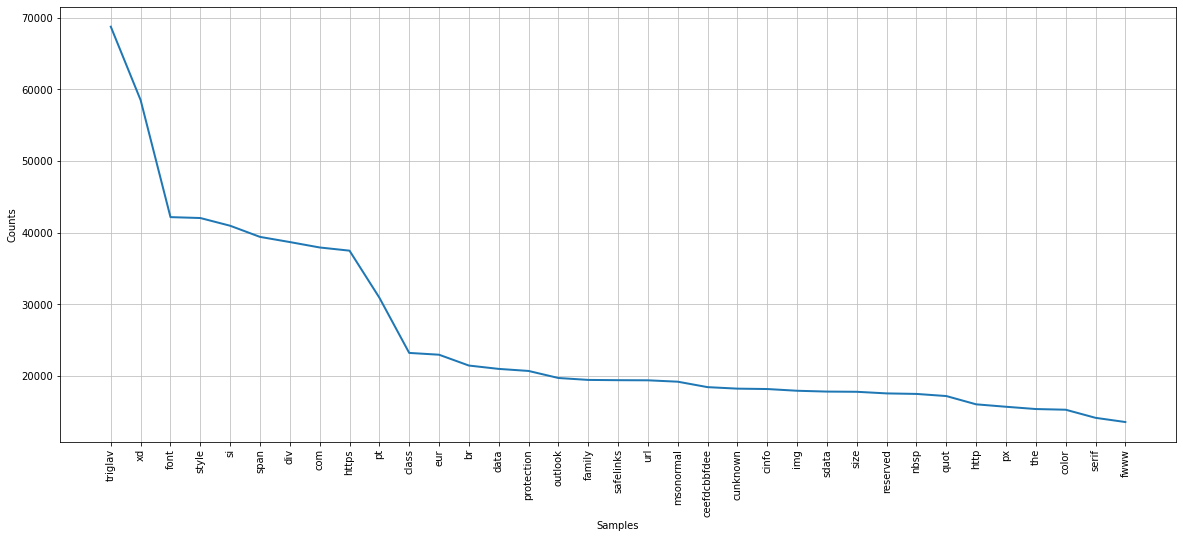

AxesSubplot(0.125,0.125;0.775x0.755)
Asistenca brez primera


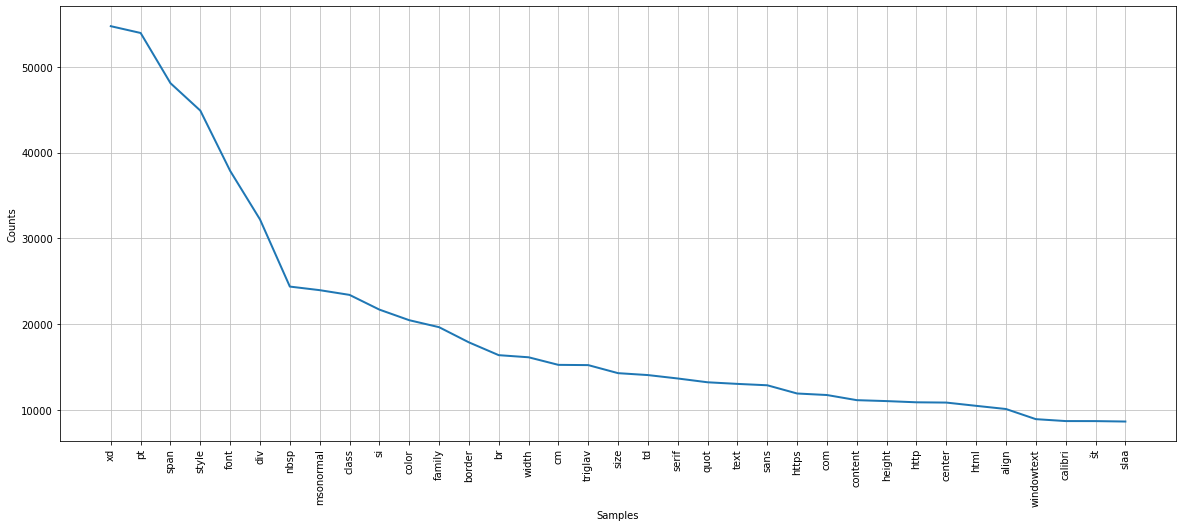

AxesSubplot(0.125,0.125;0.775x0.755)
Življenje


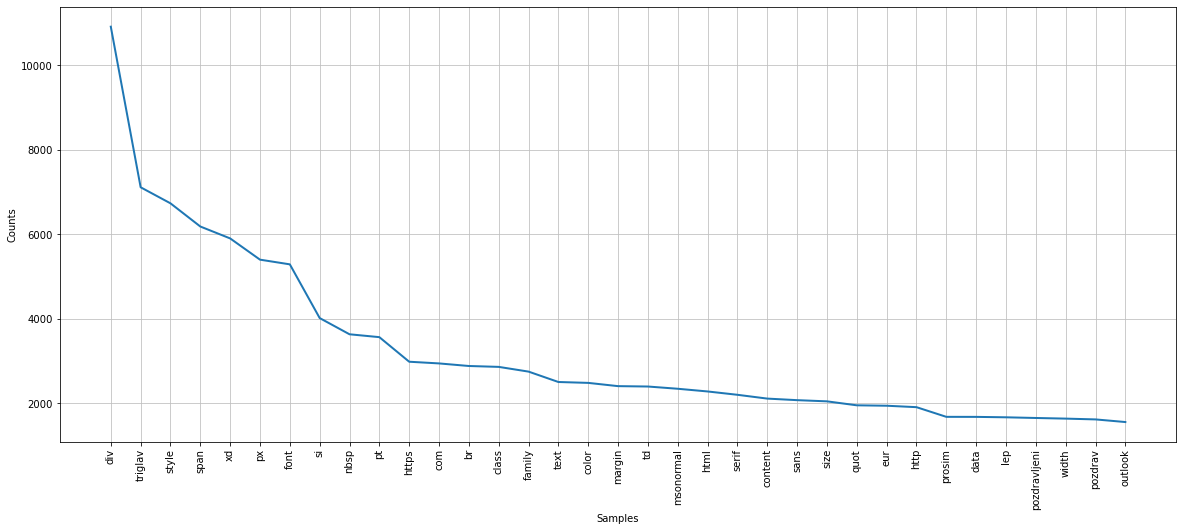

AxesSubplot(0.125,0.125;0.775x0.755)
Drajv


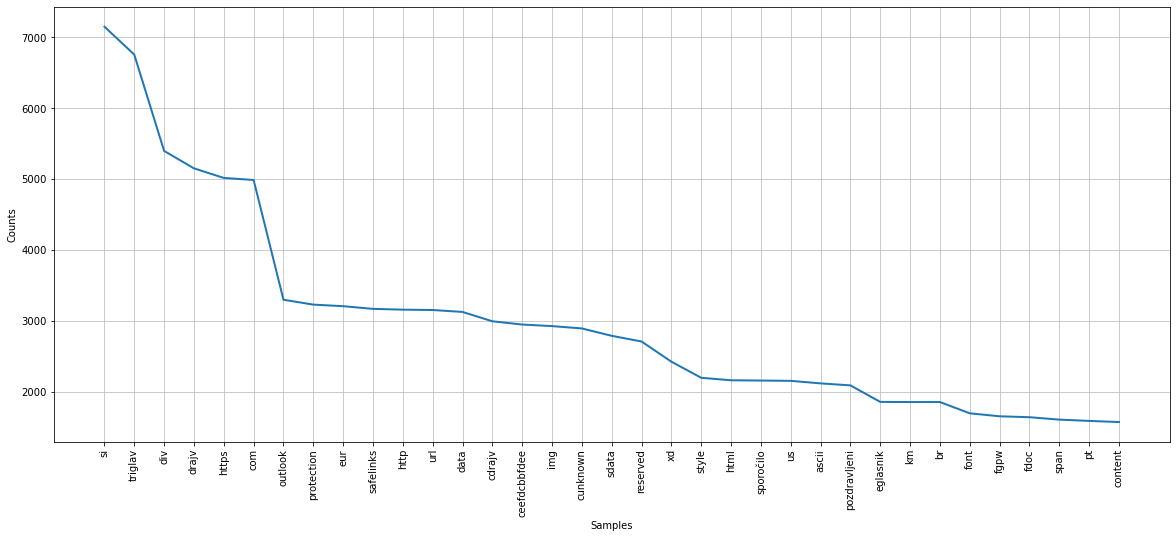

AxesSubplot(0.125,0.125;0.775x0.755)
drugo


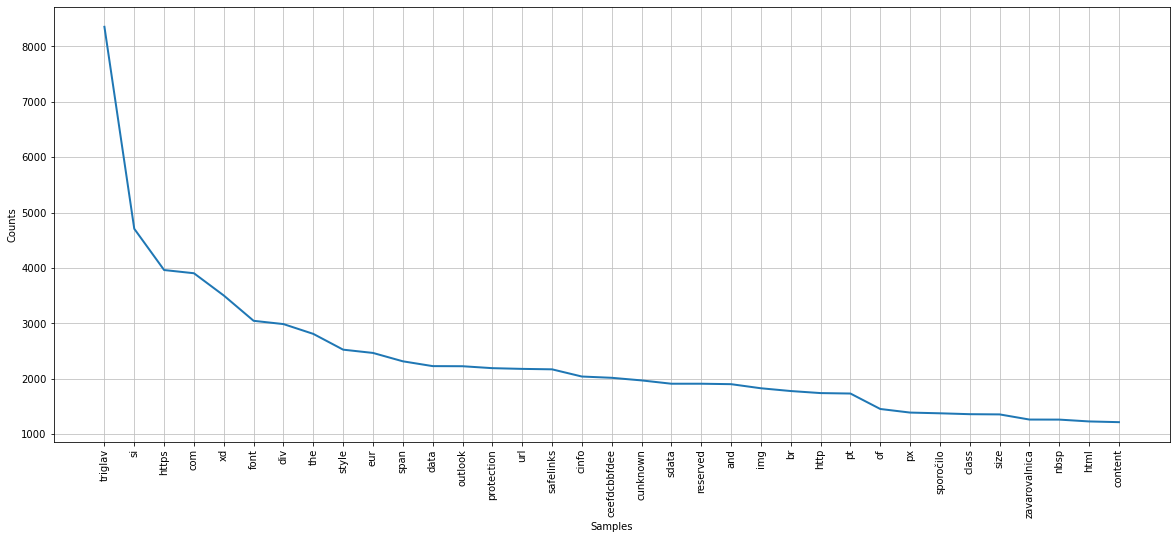

AxesSubplot(0.125,0.125;0.775x0.755)
Zdravje


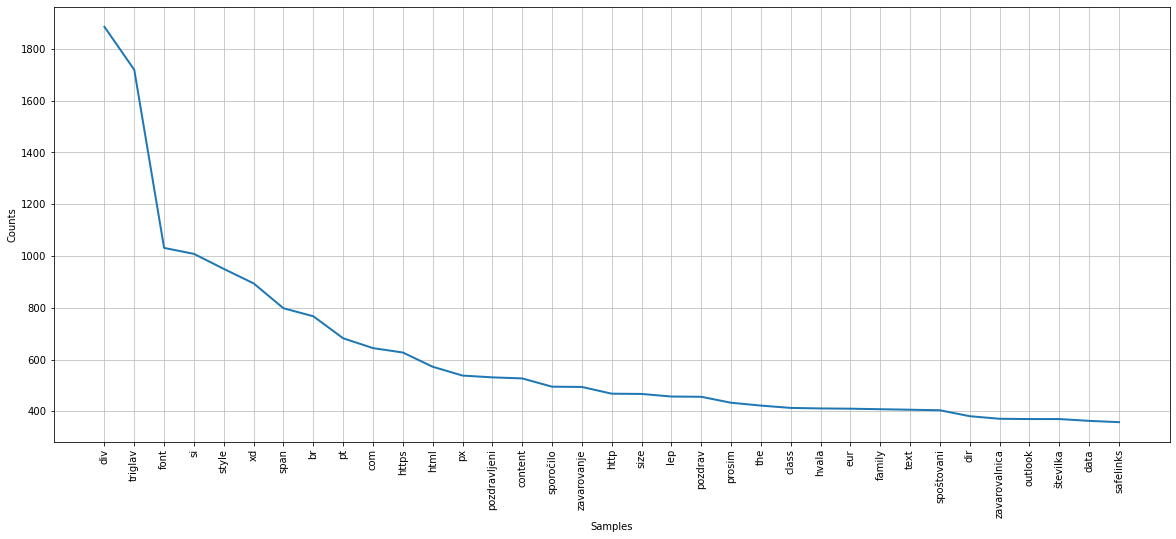

AxesSubplot(0.125,0.125;0.775x0.755)
PDPZ


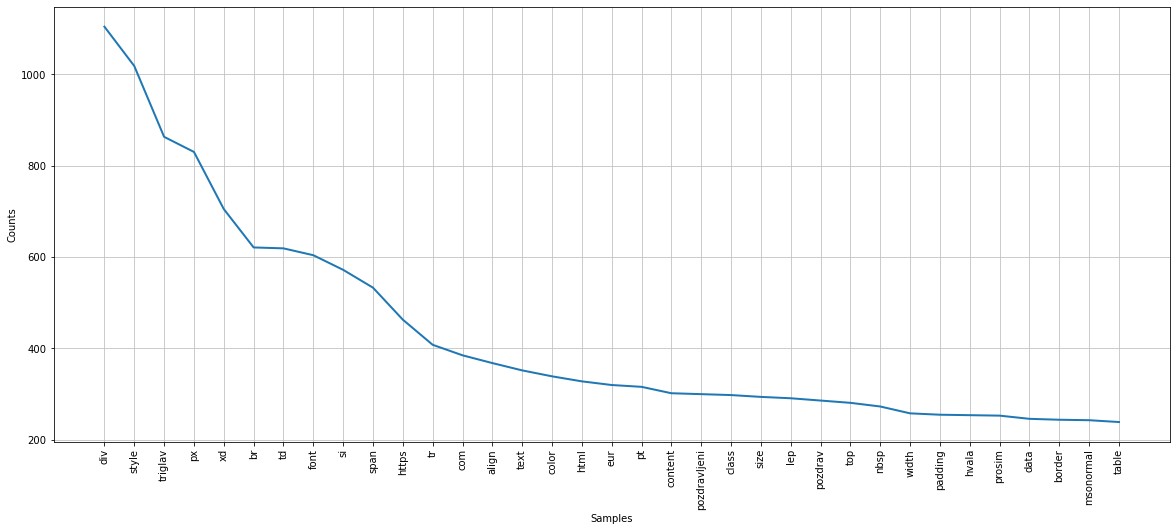

AxesSubplot(0.125,0.125;0.775x0.755)
Odjava B2B


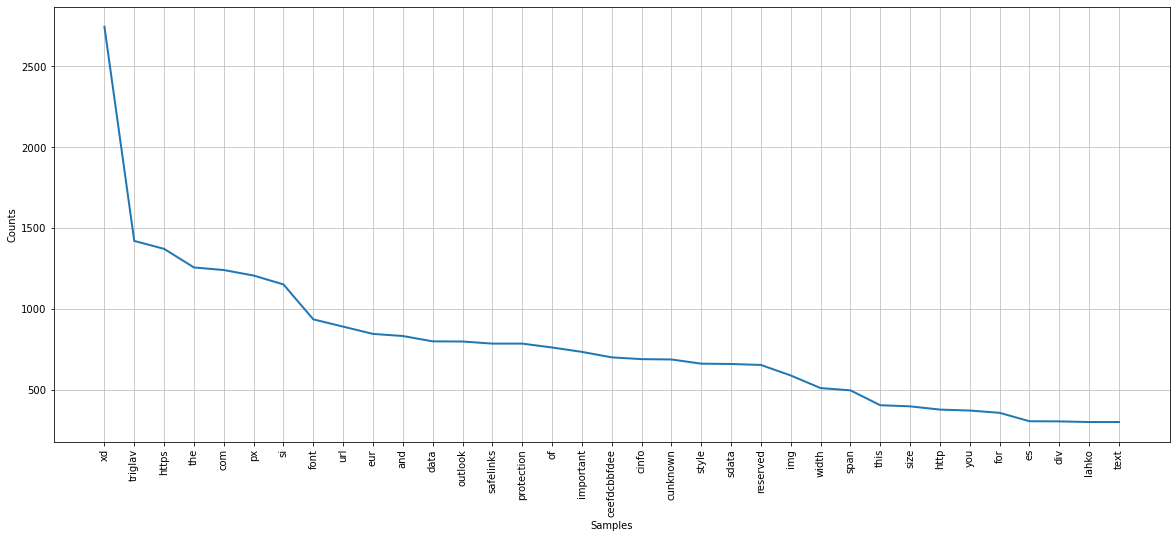

AxesSubplot(0.125,0.125;0.775x0.755)
Asistenca


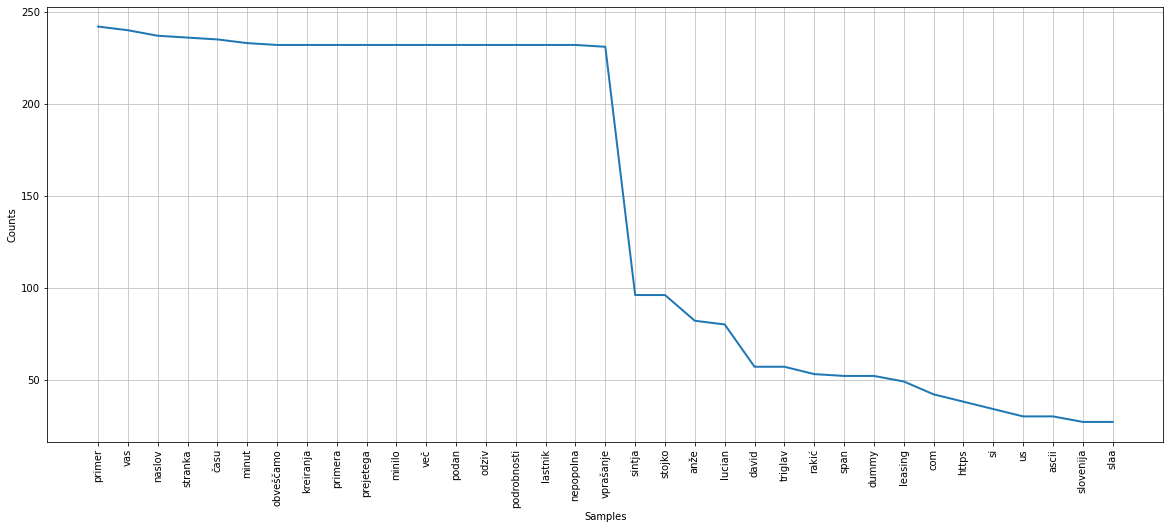

AxesSubplot(0.125,0.125;0.775x0.755)
Marketinške akcije


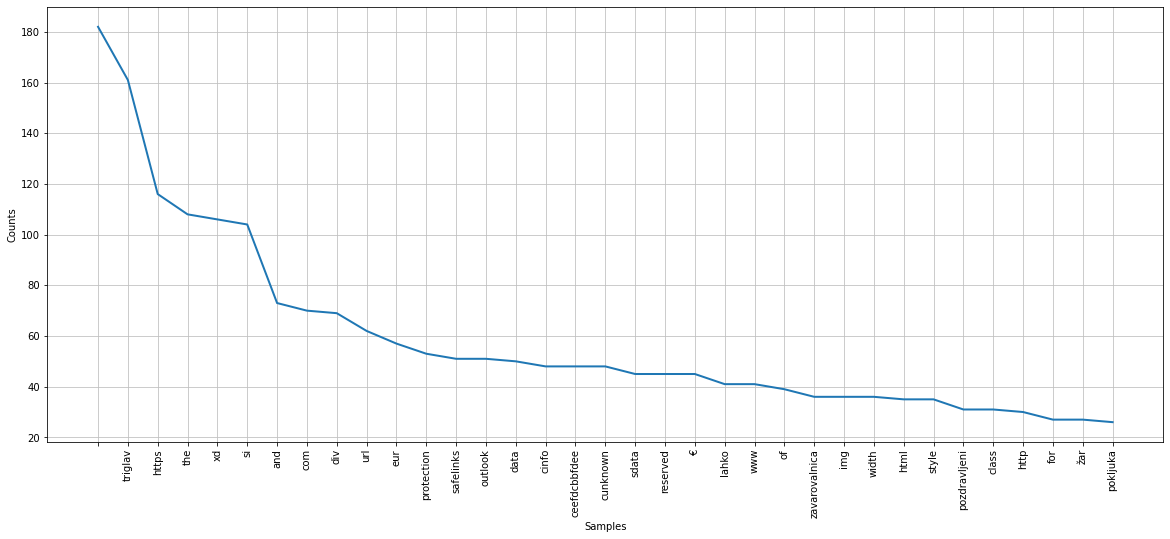

AxesSubplot(0.125,0.125;0.775x0.755)
GDPR


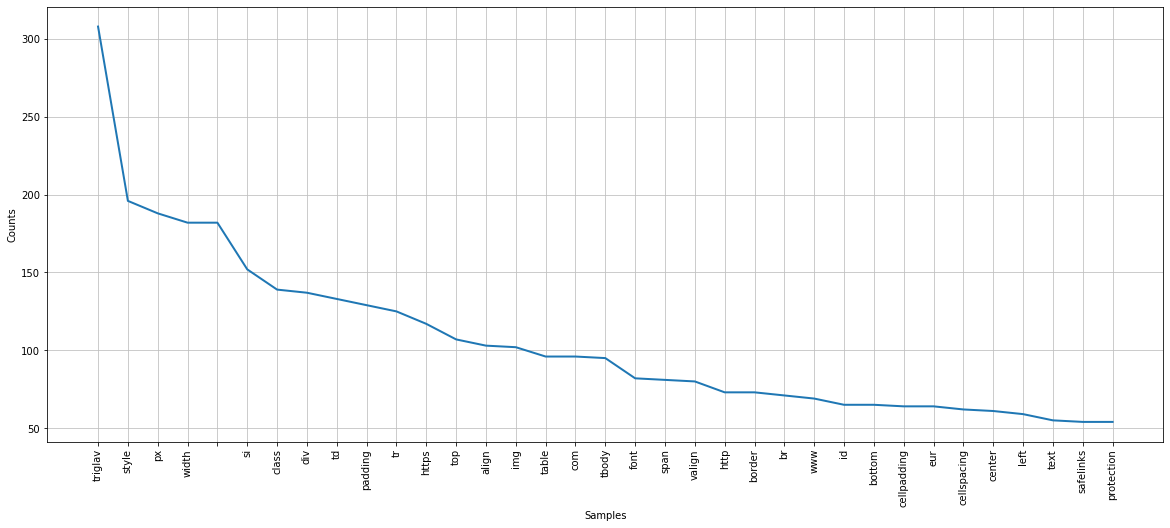

AxesSubplot(0.125,0.125;0.775x0.755)
Banke


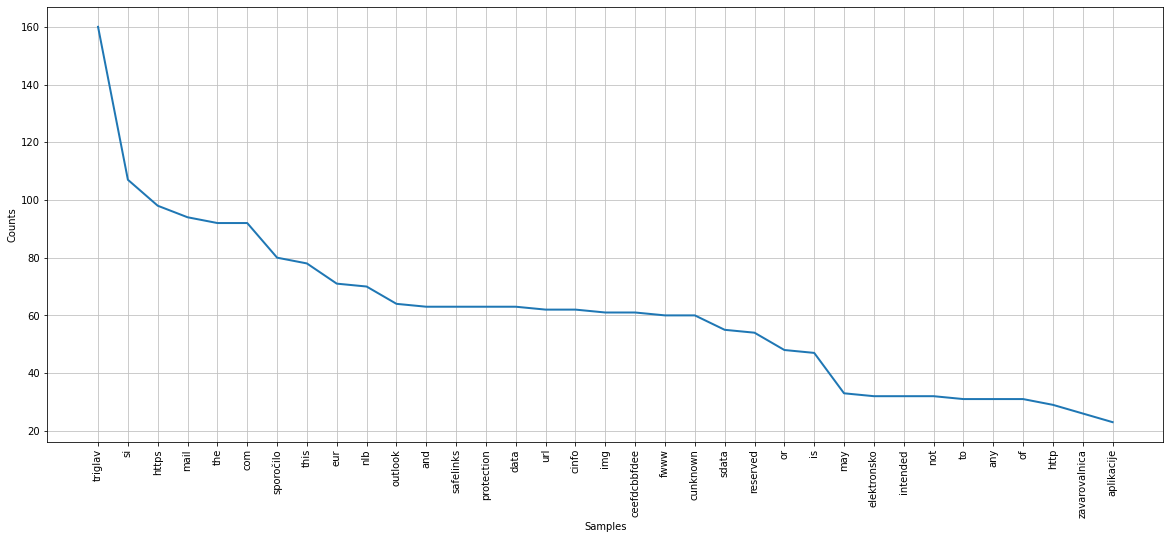

AxesSubplot(0.125,0.125;0.775x0.755)
CORIS


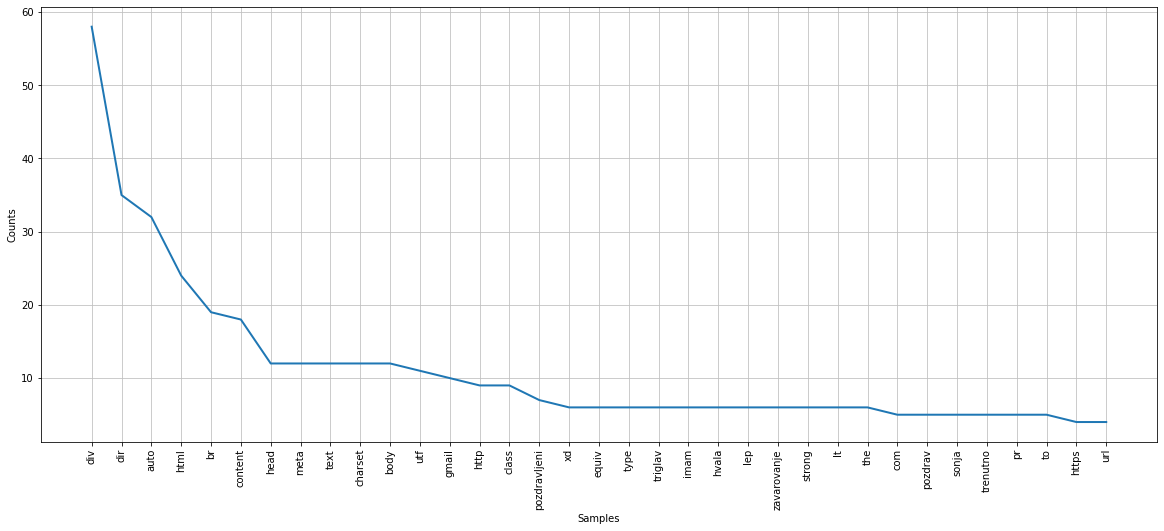

AxesSubplot(0.125,0.125;0.775x0.755)
Zavarovanja - zunanji partnerji


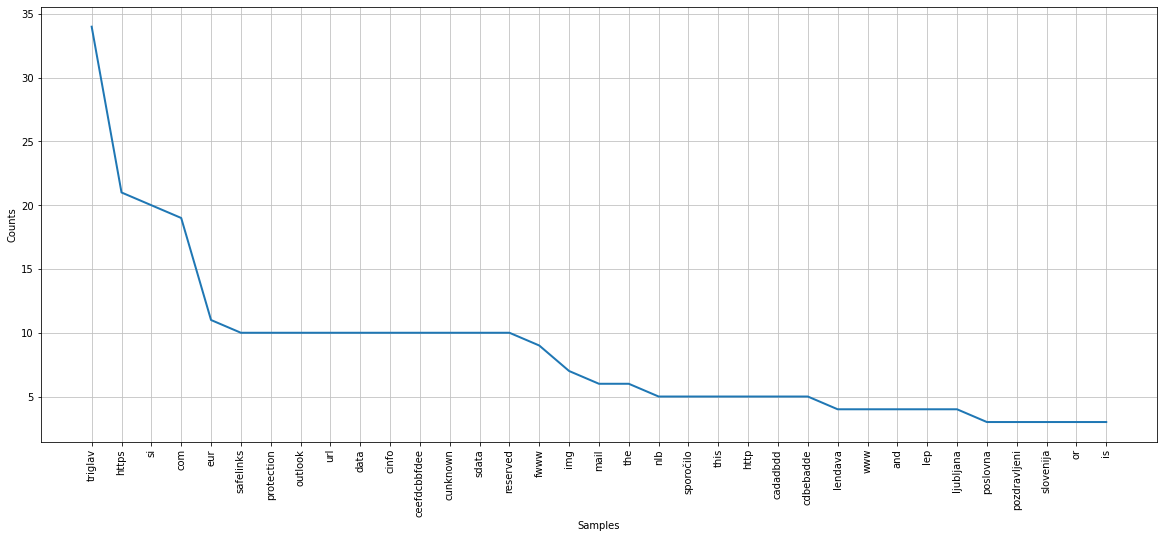

AxesSubplot(0.125,0.125;0.775x0.755)
Help desk - interna javnost


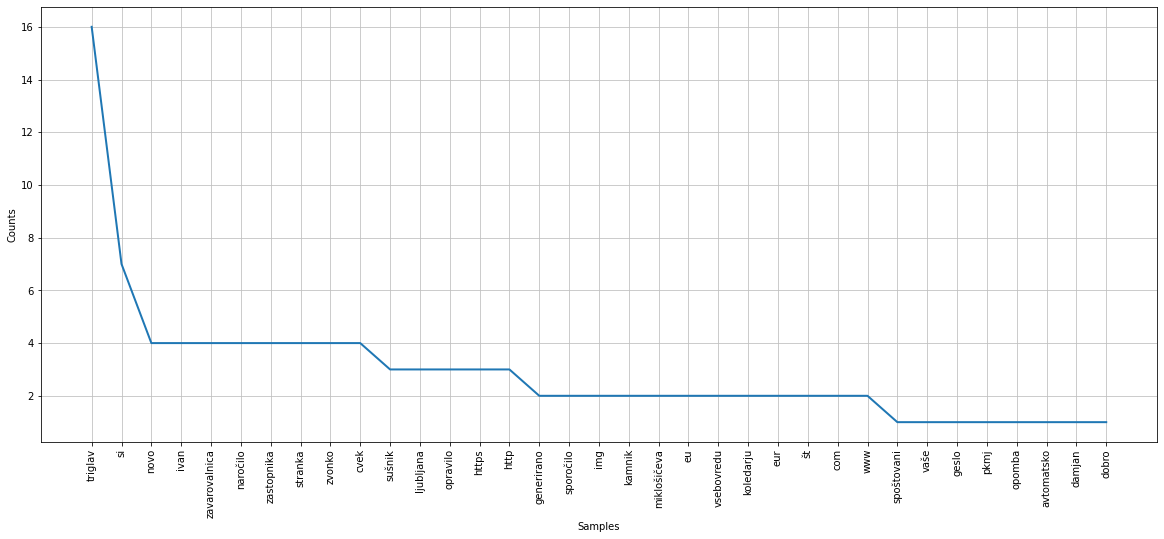

AxesSubplot(0.125,0.125;0.775x0.755)


In [85]:
ocisti_slovar(detok_dict)

In [116]:
#FUNKCIJA PREJME DATAFRAME Z RAZREDI IN DETOKENIZIRANIMI BESEDAMI - DRUG COLUMN JE SEZNAM BESED

def df_to_plots(vnos):
    
    #SPODNJA VRSTICA SPREMENI DATAFRAME V SLOVAR, KJER SO RAZREDU KLJUČI, VREDNOSTI PA VSE BESEDE
    slovar = vnos.groupby('class').apply(lambda dfg: dfg.drop('class', axis=1).to_dict(orient='list')).to_dict()
    
    from nltk.probability import FreqDist
    import matplotlib
    from matplotlib import pyplot as plt
    %matplotlib inline
    
    my_tags= ["Premoženje", "Asistenca brez primera", "Življenje", "Drajv", "drugo", 
          "Zdravje", "PDPZ", "Odjava B2B", "Asistenca", "Marketinške akcije", "GDPR", 
          "Banke", "CORIS", "Zavarovanja - zunanji partnerji",
              "Help desk - interna javnost"]
    
    for oznaka in my_tags:
        print(oznaka)
        seznam = (slovar[oznaka][vnos.columns[1]])
        besedilo = " ".join(seznam)
        besedilo = besedilo.split(" ")
        
        fdist = FreqDist()
        for beseda in besedilo:
            fdist[beseda]+=1
        
        
        fig = plt.figure(figsize=(22, 10))
        plt.title(oznaka)
        slika = fdist.plot(60)
        print(slika)
        fig.savefig(oznaka + '.jpg',dpi=300)

Premoženje


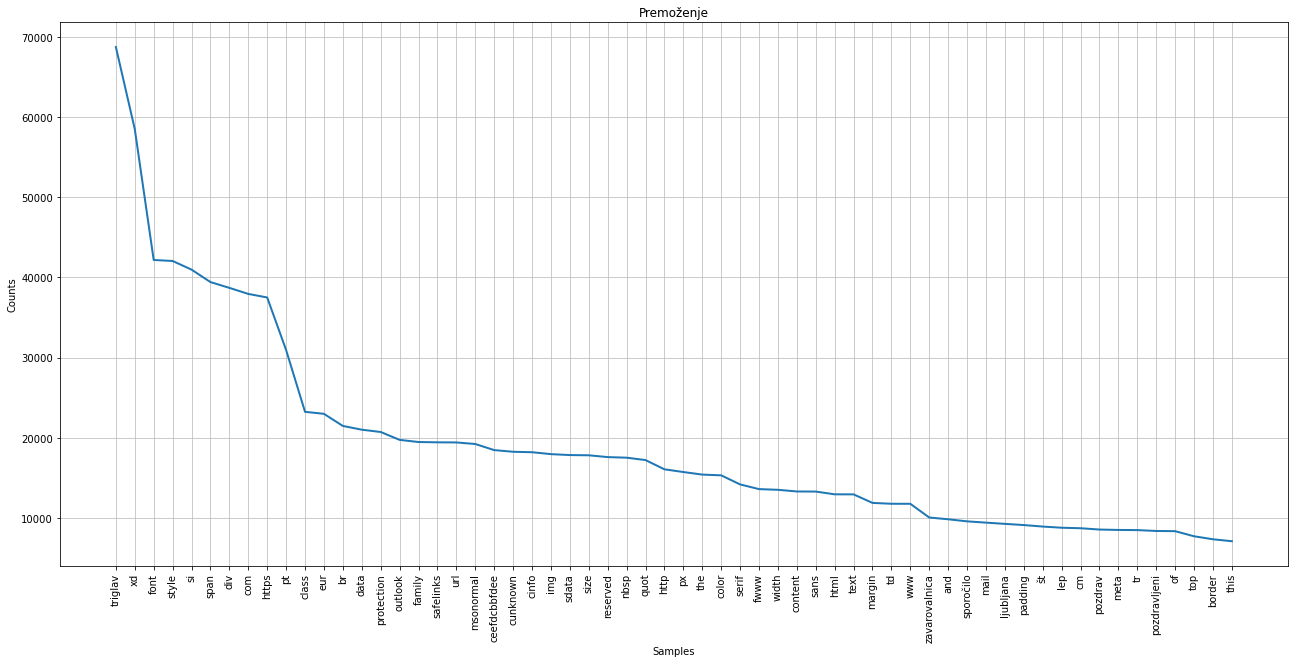

AxesSubplot(0.125,0.125;0.775x0.755)
Asistenca brez primera


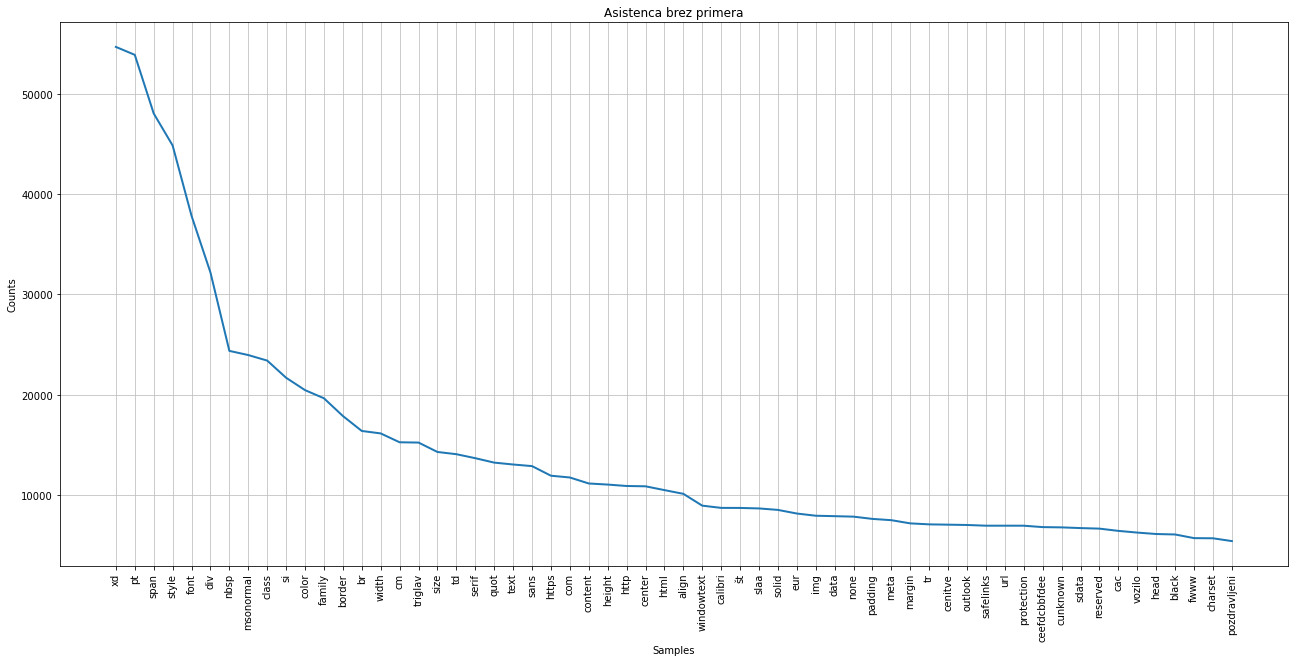

AxesSubplot(0.125,0.125;0.775x0.755)
Življenje


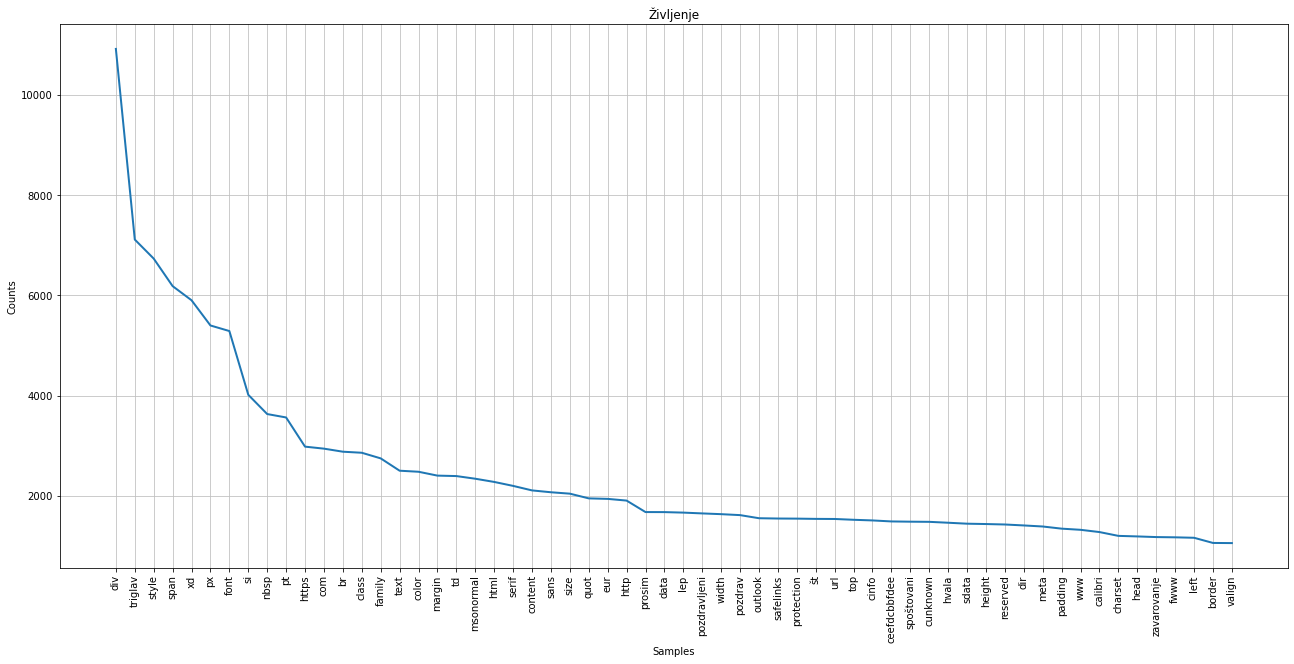

AxesSubplot(0.125,0.125;0.775x0.755)
Drajv


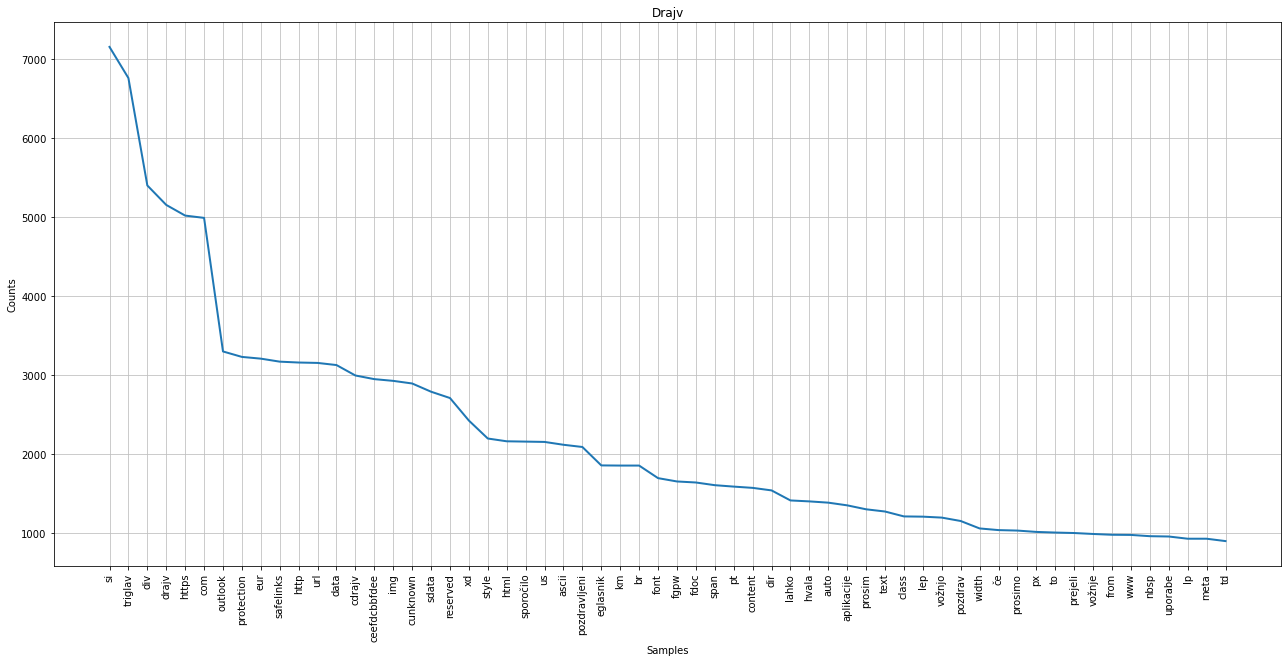

AxesSubplot(0.125,0.125;0.775x0.755)
drugo


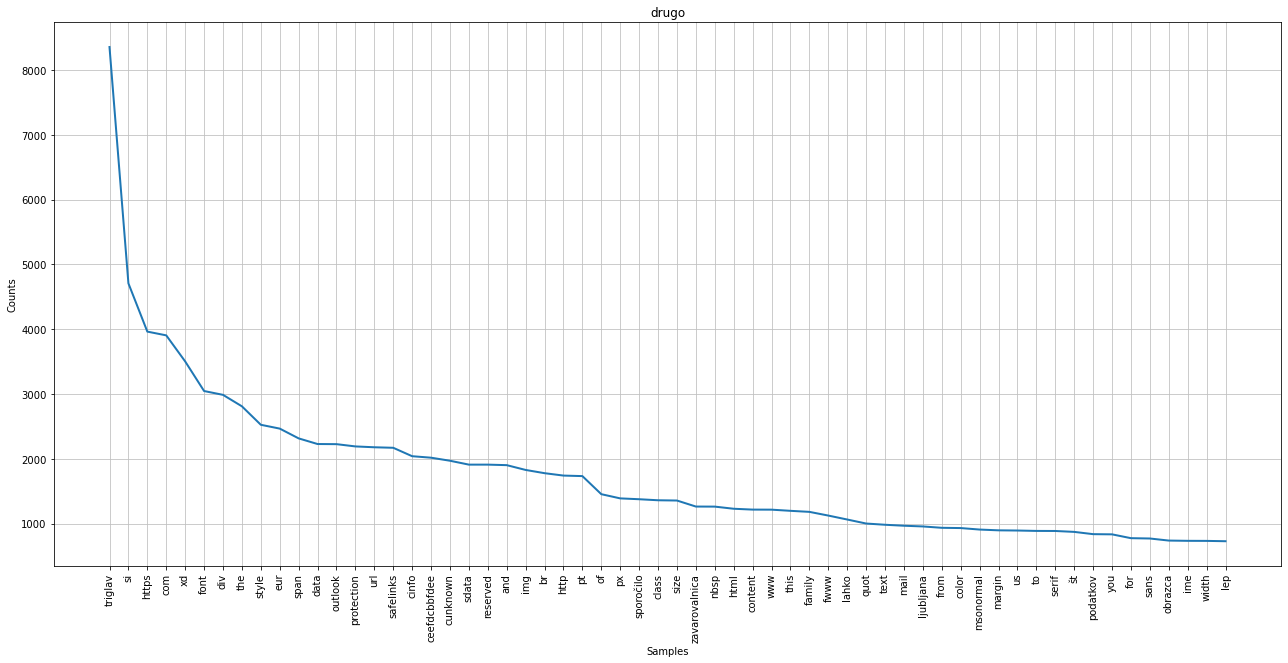

AxesSubplot(0.125,0.125;0.775x0.755)
Zdravje


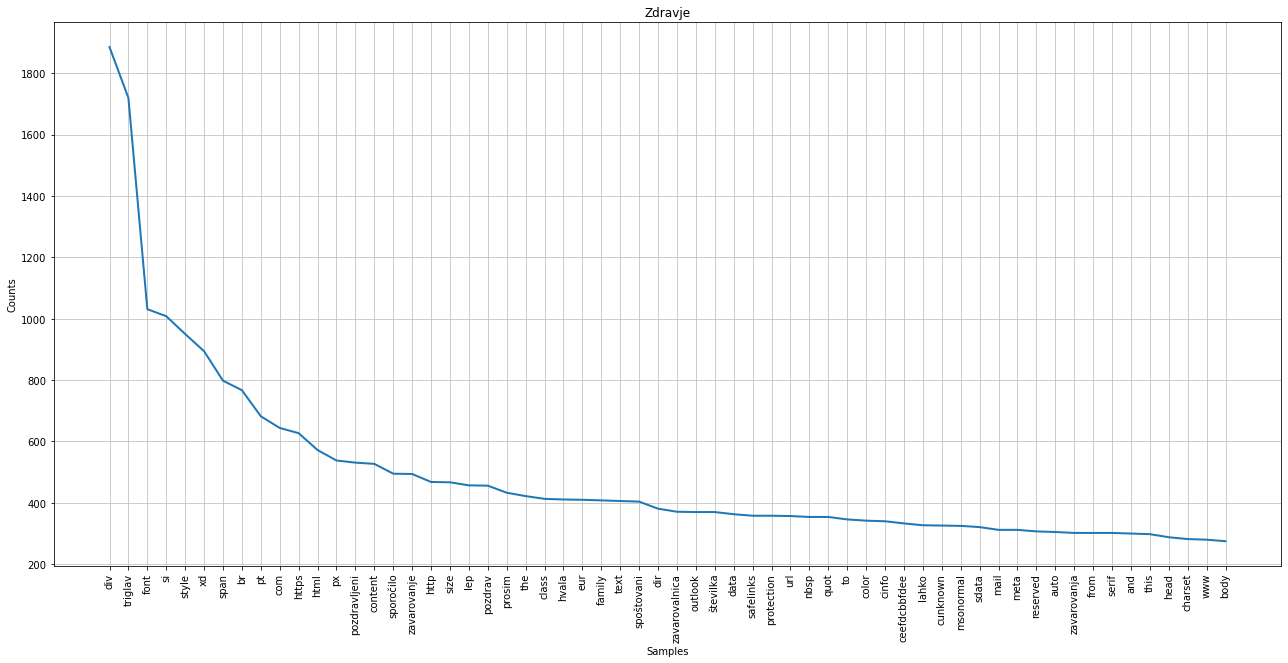

AxesSubplot(0.125,0.125;0.775x0.755)
PDPZ


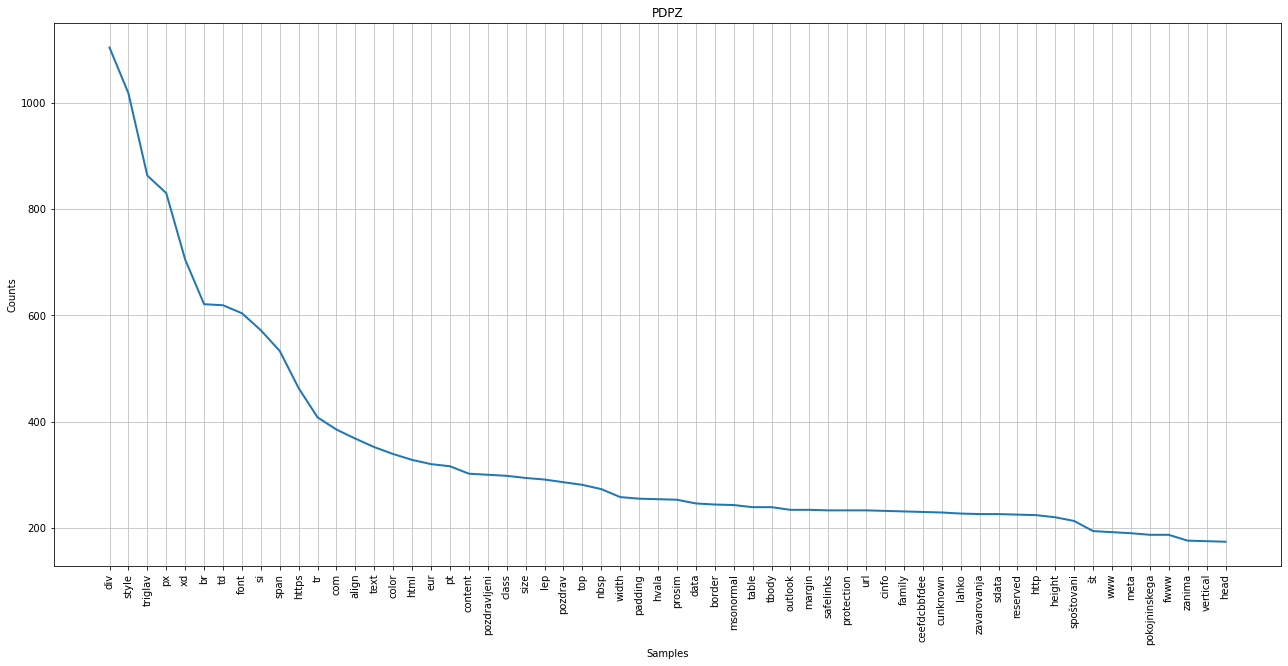

AxesSubplot(0.125,0.125;0.775x0.755)
Odjava B2B


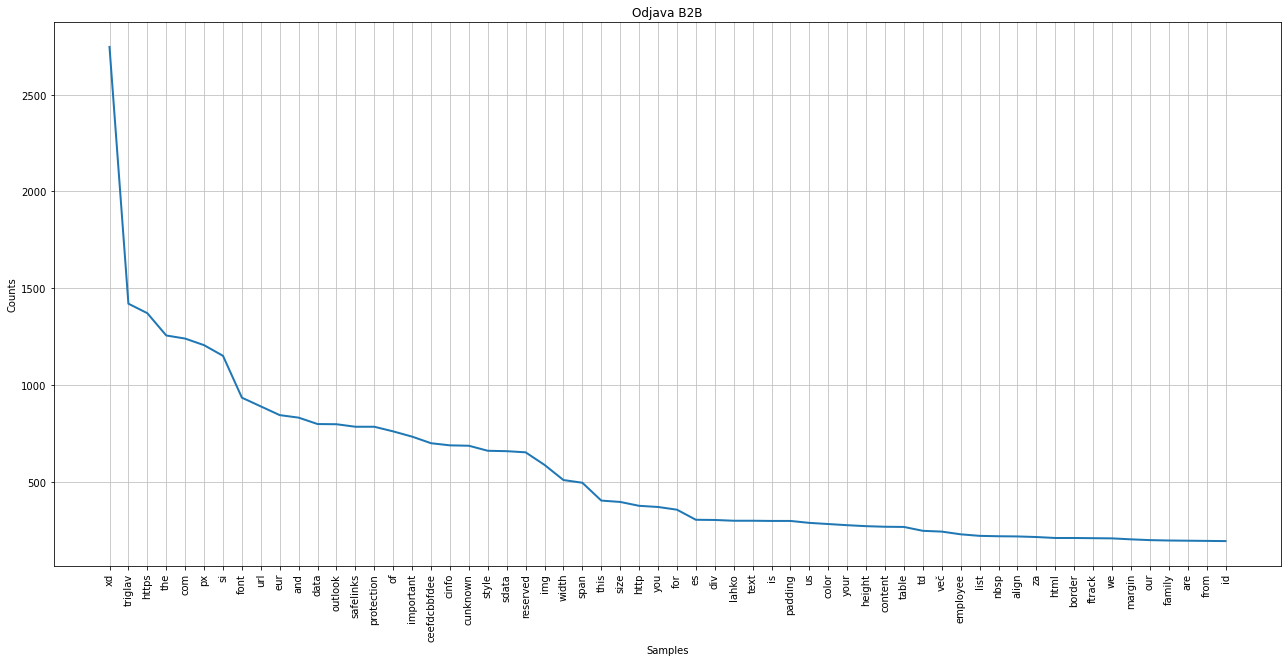

AxesSubplot(0.125,0.125;0.775x0.755)
Asistenca


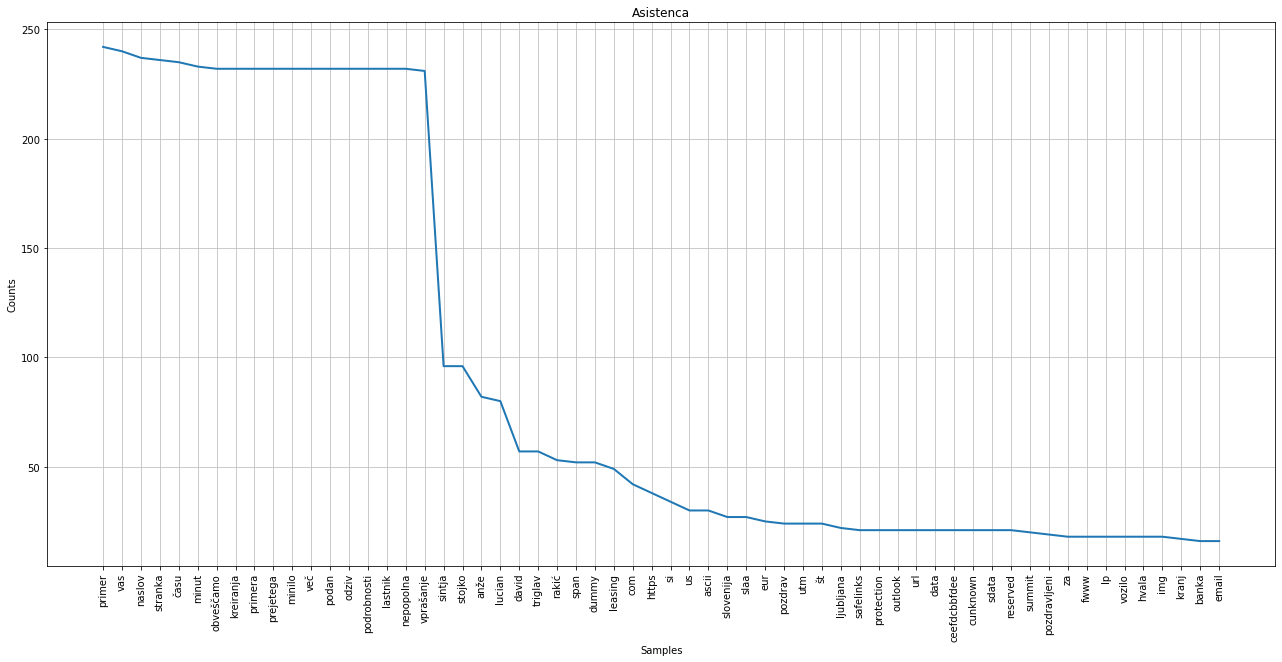

AxesSubplot(0.125,0.125;0.775x0.755)
Marketinške akcije


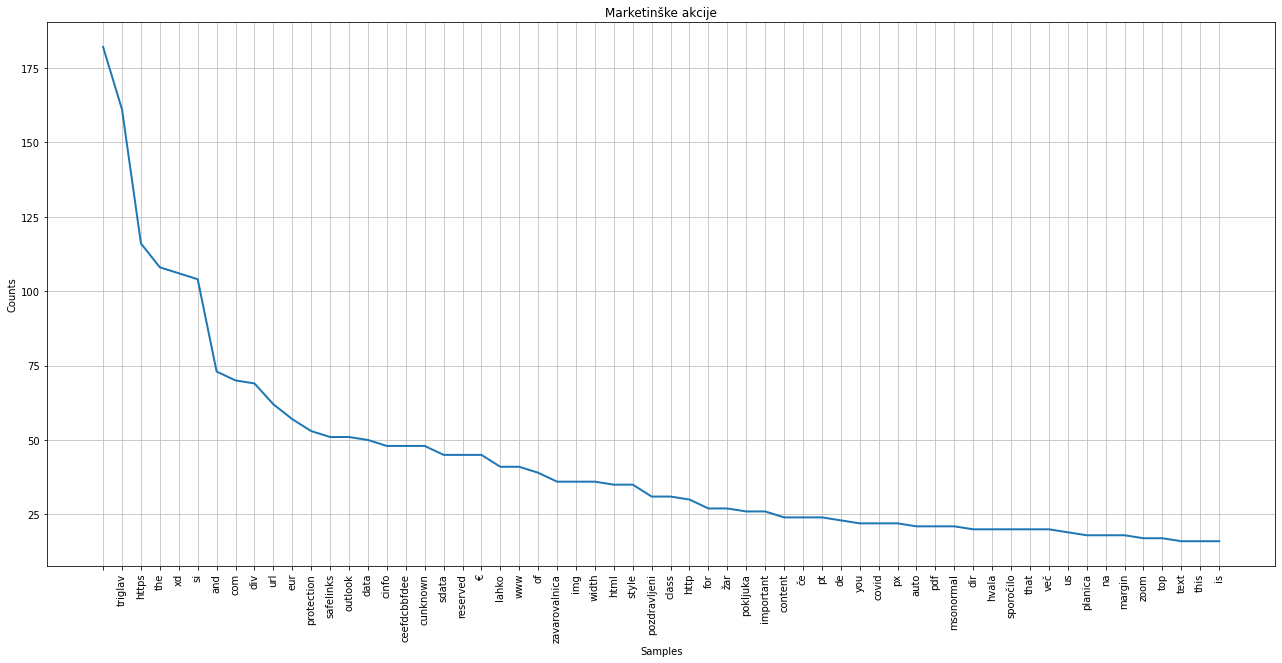

AxesSubplot(0.125,0.125;0.775x0.755)
GDPR


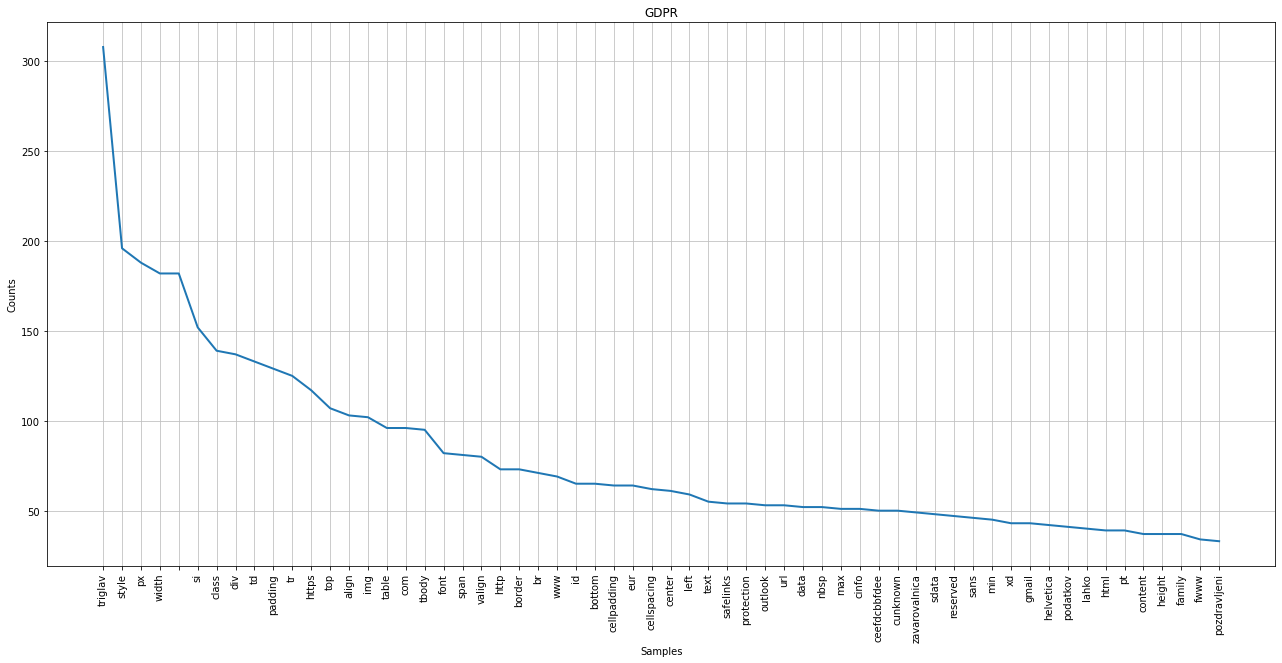

AxesSubplot(0.125,0.125;0.775x0.755)
Banke


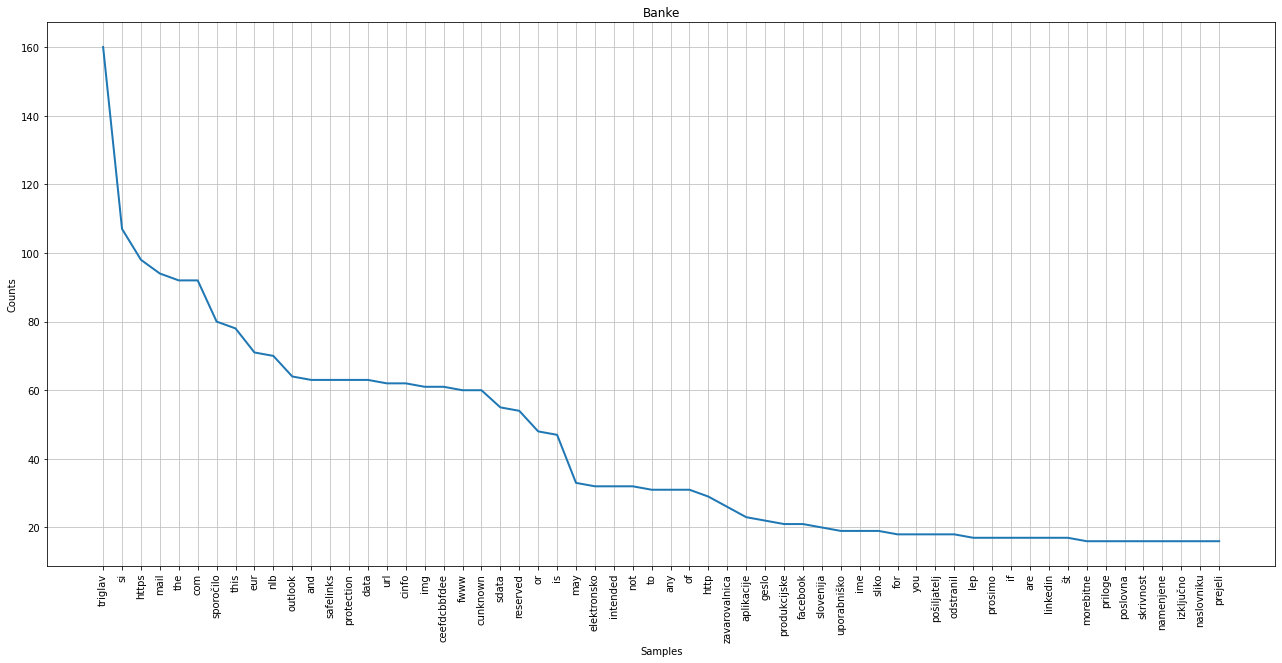

AxesSubplot(0.125,0.125;0.775x0.755)
CORIS


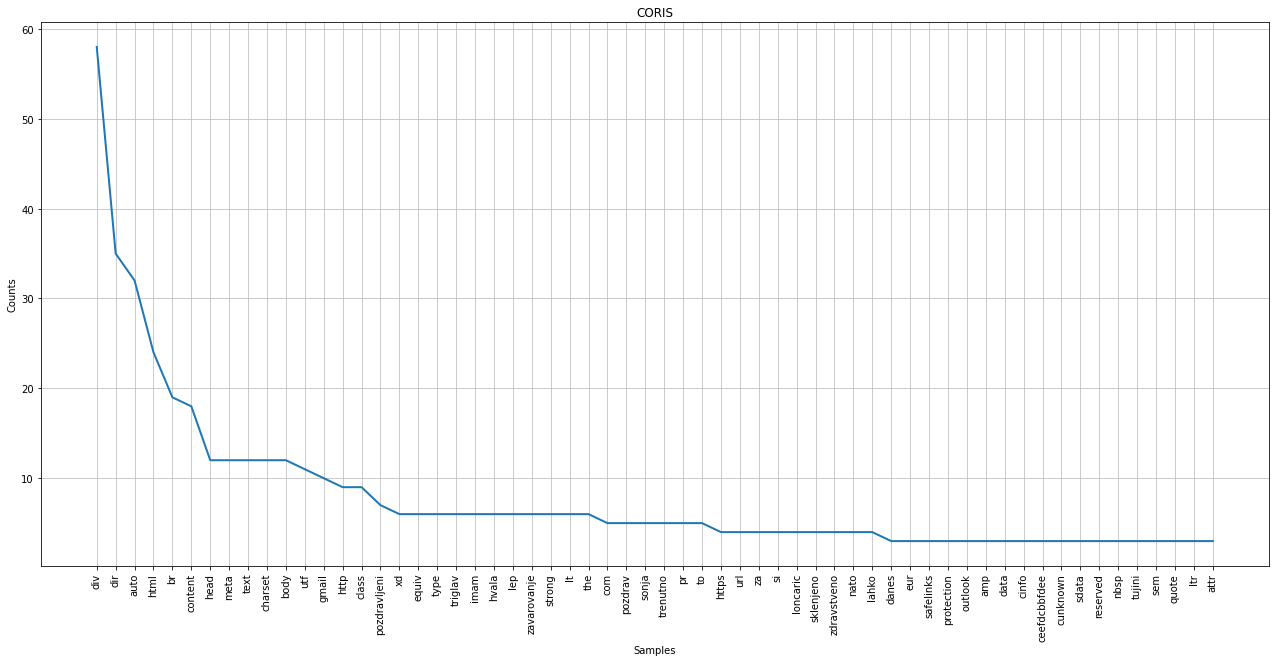

AxesSubplot(0.125,0.125;0.775x0.755)
Zavarovanja - zunanji partnerji


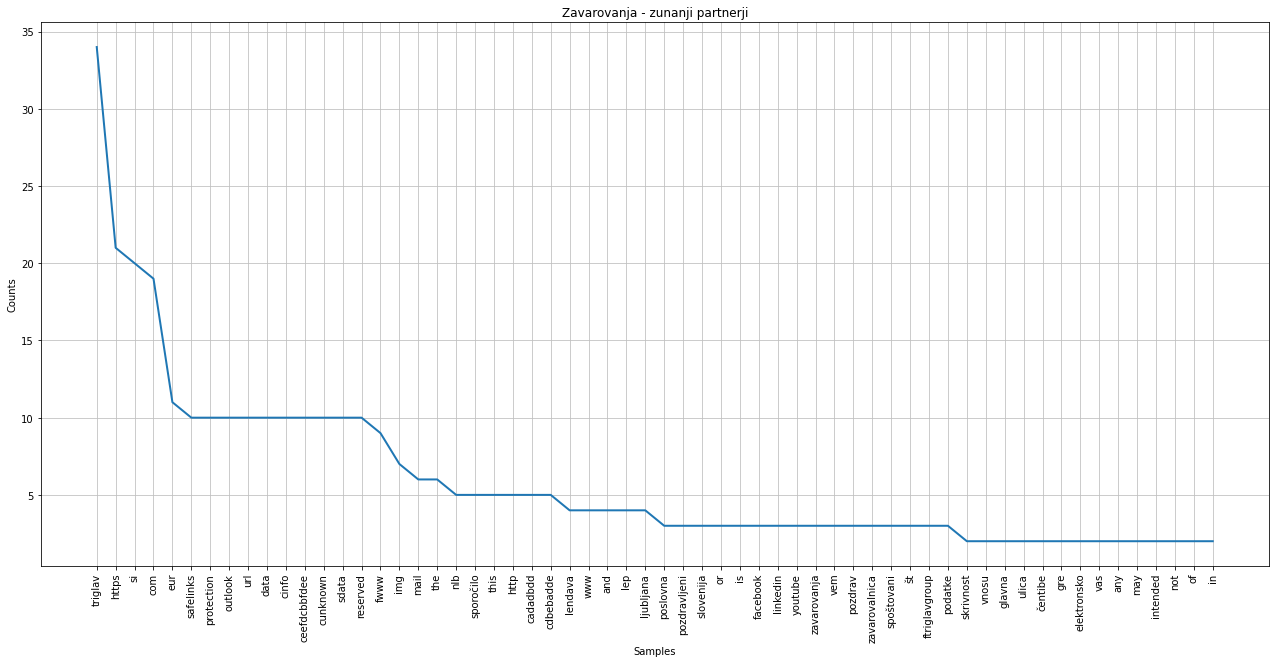

AxesSubplot(0.125,0.125;0.775x0.755)
Help desk - interna javnost


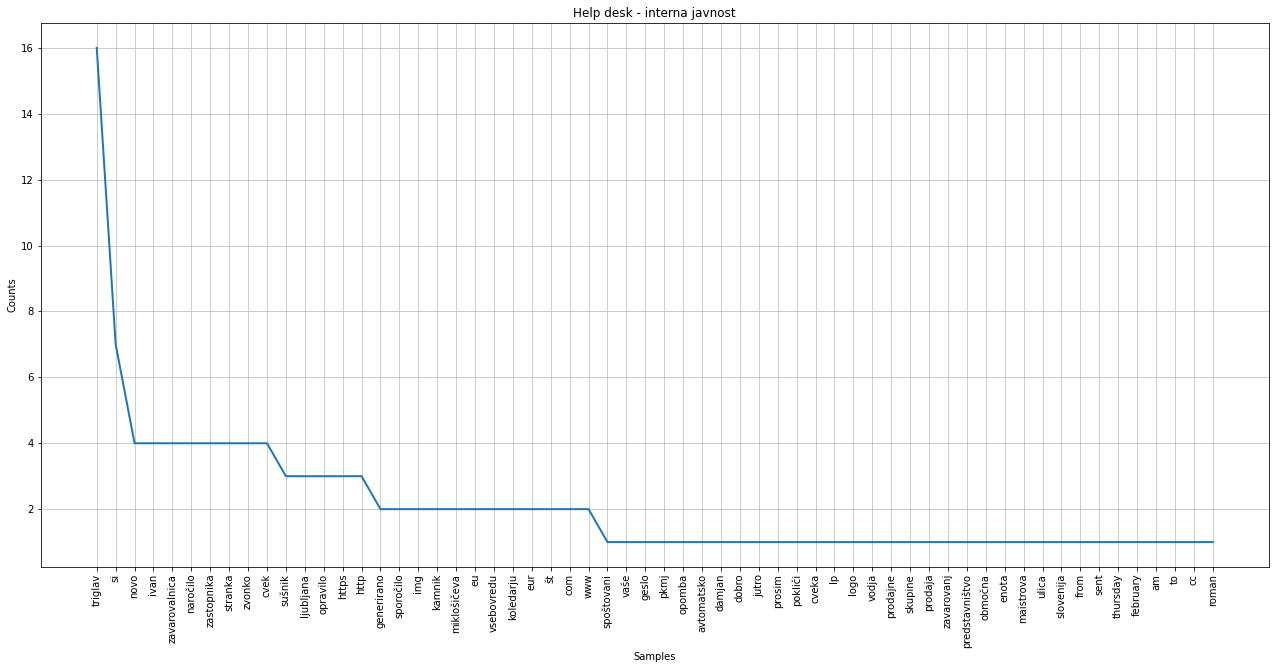

AxesSubplot(0.125,0.125;0.775x0.755)


In [117]:
df_to_plots(df_detok)